**<font size=48>Applied Machine Learning Python Tutorial</font>**<br>
<br>
Jupyter notebook by Volodymyr Kuleshov, Isaac Caswell, Shachi Deshpande, Alexandre St-Pierre-See based on the [CS231n Python v3.0 tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson.

# Introduction
Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

We expect that many of you will have some experience with Python and numpy; for the rest of you, this section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

Some of you may have previous knowledge in Matlab, in which case we also recommend the [numpy for Matlab users page](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html).

In this tutorial, we will cover:

* [Python](#python)
    * [Basic data types](#python-basic)
    * [Containers](#python-containers)
        * [Lists](#python-lists)
        * [Dictionaries](#python-dicts)
        * [Sets](#python-sets)
        * [Tuples](#python-tuples)
    * [Functions](#python-functions)
    * [Classes](#python-classes)
* [Numpy](#numpy)
    * [Arrays](#numpy-arrays)
    * [Array indexing](#numpy-array-indexing)
    * [Datatypes](#numpy-datatypes)
    * [Array math](#numpy-array-math)
    * [Broadcasting](#numpy-broadcasting)
* [SciPy](#scipy)
    * [Image operations](#scipy-image-operations)
    * [MATLAB files](#scipy-matlab)
    * [Distance between points](#scipy-distance)
* [Matplotlib](#mpl)
    * [Plotting](#mpl-plot)
    * [Subplots](#mpl-subplot)
    * [Images](#mpl-images)

# <a id="python">Python</a>
Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


### Python versions
There are currently two different supported versions of Python, 2.7 and 3.7. Somewhat confusingly, Python 3.0 introduced many backwards-incompatible changes to the language, so code written for 2.7 may not work under 3.7 and vice versa. For this class all code will use Python 3.7. The latest Python version is 3.8.5 currently.

You can check your Python version at the command line by running `python --version`.

## <a id="python-basic">Basic data types</a>
Like most languages, Python has a number of basic types including integers, floats, booleans, and strings. These data types behave in ways that are familiar from other programming languages.

**Numbers**: Integers and floats work as you would expect from other languages:

Note that unlike many languages, Python does not have unary increment (`x++`) or decrement (`x--`) operators.

Python also has built-in types for complex numbers; you can find all of the details [in the documentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-complex).

**Booleans**: Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

**Strings**: Python has great support for strings:

In [2]:
hw12 = '%s %s %d' % ("hello", "world", 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

hello world 12


String objects have a bunch of useful methods; for example:

In [3]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "

Hello
HELLO
  hello
 hello 


In [4]:
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"

he(ell)(ell)o


In [5]:
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

world


You can find a list of all string methods [in the documentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

## <a id="python-containers">Containers</a>
Python includes several built-in container types: lists, dictionaries, sets, and tuples.

### <a id="python-lists">Lists</a>
A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [6]:
xs = [3, 1, 2]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-2])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
1


In [7]:
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"

[3, 1, 'foo']


In [8]:
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"

[3, 1, 'foo', 'bar']


In [9]:
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"

bar [3, 1, 'foo']


In [10]:
xs.pop(1) # remove element from a specific position
print(xs)

[3, 'foo']


As usual, you can find all the gory details about lists [in the documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

**Slicing**: In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [11]:
nums = list(range(5))     # range is a built-in function that creates a list of integers
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]


In [12]:
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 8, 9, 4]


We will see slicing again in the context of numpy arrays.

**Loops**: You can loop over the elements of a list like this:

In [13]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
# Prints "cat", "dog", "monkey", each on its own line.

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [14]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: cat", "#2: dog", "#3: monkey", each on its own line

#1: cat
#2: dog
#3: monkey


**List comprehensions**: When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [15]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


You can make this code simpler using a **list comprehension**:

In [16]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [17]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 1]
print(even_squares)  # Prints "[0, 4, 16]"

[1, 9]


### <a id="python-dicts">Dictionaries</a>
A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [18]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [19]:
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"
#print(d['monkey'])  # KeyError: 'monkey'

wet


In [20]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

N/A
wet
N/A


You can find all you need to know about dictionaries [in the documentation](https://docs.python.org/3.7/library/stdtypes.html#dict).

**Loops**: It is easy to iterate over the keys in a dictionary:

In [21]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    #legs = d[animal]
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


**Dictionary comprehensions**: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [22]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # Prints "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


In [23]:
another_dict = {x:x**3 for x in even_num_to_square}
print(another_dict)

{0: 0, 2: 8, 4: 64}


### <a id="python-sets">Sets</a>
A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [24]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

True
False


In [25]:
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"

True
3


In [26]:
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"

3


In [27]:
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

2


As usual, everything you want to know about sets can be found [in the documentation](https://docs.python.org/3.7/library/stdtypes.html#set).

**Loops**: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [28]:
animals = {'cat', 'dog', 'fish', 'otter'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: dog
#2: cat
#3: fish
#4: otter


**Set comprehensions**: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [29]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print(nums)  # Prints "{0, 1, 2, 3, 4, 5}"

{0, 1, 2, 3, 4, 5}


### <a id="python-tuples">Tuples</a>
A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [30]:
t=(1,2)
print(t)
print(type(t))
print(t[0])



(1, 2)
<class 'tuple'>
1


In [31]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)        # Create a tuple
print(type(t))    # Prints "<class 'tuple'>"
print(d[t])       # Prints "5"
print(d[(1, 2)])  # Prints "1"

<class 'tuple'>
5
1


[The documentation](https://docs.python.org/3.7/tutorial/datastructures.html#tuples-and-sequences) has more information about tuples.

## <a id="python-functions">Functions</a>
Python functions are defined using the def keyword. For example:

In [32]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
# Prints "negative", "zero", "positive"

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [33]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s!' % name.upper())
    else:
        print('Hello, %s' % name)

hello('Bob') # Prints "Hello, Bob"
hello('Fred', loud=True)  # Prints "HELLO, FRED!"

Hello, Bob
HELLO, FRED!


There is a lot more information about Python functions [in the documentation](https://docs.python.org/3.7/tutorial/controlflow.html#defining-functions).

## <a id="python-classes">Classes</a>
The syntax for defining classes in Python is straightforward:

In [34]:
class Greeter(object):

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


You can read a lot more about Python classes [in the documentation](https://docs.python.org/3.7/tutorial/classes.html).

# <a id="numpy">Numpy</a>
[Numpy](http://www.numpy.org/) is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find [this tutorial useful](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) to get started with Numpy.

## <a id="numpy-arrays">Arrays</a>
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [35]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(a)
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"

[1 2 3]
<class 'numpy.ndarray'>
(3,)
1 2 3


In [36]:
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

[5 2 3]


In [37]:
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b)
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [38]:
import numpy as np

a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

[[0. 0.]
 [0. 0.]]


In [39]:
b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

[[1. 1.]]


In [40]:
c = np.full((2,2), 7.)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

[[7. 7.]
 [7. 7.]]


In [41]:
d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

[[1. 0.]
 [0. 1.]]


In [42]:
e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0.09770508 0.38683094]
 [0.30762836 0.28699133]]


You can read about other methods of array creation [in the documentation](http://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation).

## <a id="numpy-array-indexing">Array indexing</a>
Numpy offers several ways to index into arrays.

**Slicing**: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [43]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

In [44]:
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

In [45]:
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [46]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

In [47]:
# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [48]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing**: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [49]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

In [50]:
# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

[1 4 5]


In [51]:
# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

[1 4 5]


In [52]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

[2 2]


In [53]:
# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [54]:
import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [55]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [56]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Boolean array indexing**: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [57]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

[[False False]
 [ True  True]
 [ True  True]]


In [58]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

[3 4 5 6]


In [59]:
# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should [read the documentation](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

## <a id="numpy-datatypes">Datatypes</a>
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [60]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

int32


In [61]:
x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

float64


In [62]:
x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)


int64


You can read all about numpy datatypes [in the documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

## <a id="numpy-array-math">Array math</a>
Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [63]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [64]:
# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [65]:
# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [66]:
# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [67]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [68]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [69]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

In [70]:
# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [71]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [72]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [73]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy [in the documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [74]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [75]:
# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[1 2 3]
[1 2 3]


Numpy provides many more functions for manipulating arrays; you can see the full list [in the documentation](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

## <a id="numpy-broadcasting">Broadcasting</a>
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [76]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v
    
# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector `v` to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [77]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [78]:
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`. Consider this version, using broadcasting:

In [79]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if `v` actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
1. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
1. The arrays can be broadcast together if they are compatible in all dimensions.
1. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
1. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension
If this explanation does not make sense, try reading the explanation [from the documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or [this explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions [in the documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [80]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [81]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

[[2 4 6]
 [5 7 9]]


In [82]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [83]:
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [84]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

## Numpy Documentation
This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

# <a id="scipy">SciPy</a>
Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. [SciPy](http://docs.scipy.org/doc/scipy/reference/) builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

The best way to get familiar with SciPy is to [browse the documentation](http://docs.scipy.org/doc/scipy/reference/index.html). We will highlight some parts of SciPy that you might find useful for this class.

## <a id="scipy-image-operations">Image operations</a>
SciPy provides some basic functions to work with images. For example, it has functions to read images from disk into numpy arrays, to write numpy arrays to disk as images, and to resize images. Here is a simple example that showcases these functions (**some SciPy methods were deprecated after the original production of this tutorial, imports were adapted in order to keep the code working**):

In [ ]:
import numpy as np
from imageio import imread, imwrite
from skimage.transform import resize
import matplotlib.pyplot as plt

# Read an JPEG image into a numpy array
img = imread('../assets/cat.jpg')
print(img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = (img * [1, 0.95, 0.9])
print(img_tinted.dtype, img_tinted.shape)  # Prints "float64 (400, 248, 3)"

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = resize(img_tinted, (300, 300)).astype(dtype=np.uint8)
print(img_tinted.dtype, img_tinted.shape)  # Prints "uint8 (300, 248, 3)"

# Write the tinted image back to disk
imwrite('../assets/cat_tinted.jpg', img_tinted)

uint8 (400, 248, 3)
float64 (400, 248, 3)
uint8 (300, 300, 3)


C:\Users\p3t1k\AppData\Local\Temp\ipykernel_40528\1207568609.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('../statics/cat.jpg')


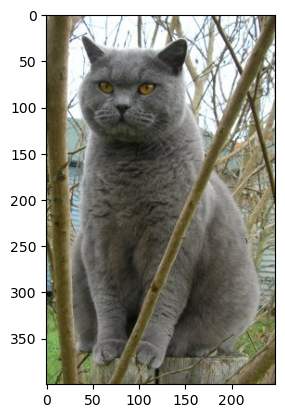

In [86]:
# Show original images - Matplotlib will be presented later
plt.imshow(img)
plt.show()

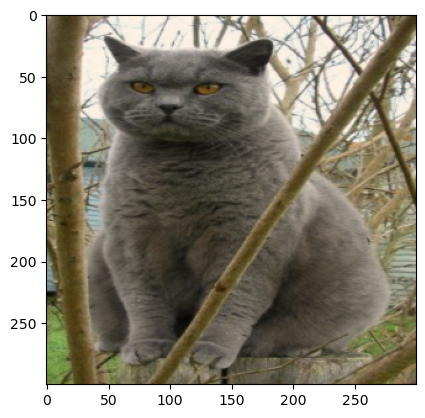

In [87]:
# Show manipulated image
plt.imshow(img_tinted)
plt.show()

## <a id="scipy-matlab">MATLAB files</a>
The functions `scipy.io.loadmat` and `scipy.io.savemat` allow you to read and write MATLAB files. You can read about them [in the documentation](http://docs.scipy.org/doc/scipy/reference/io.html).

## <a id="scipy-distance">Distance between points</a>
SciPy defines some useful functions for computing distances between sets of points.

The function `scipy.spatial.distance.pdist` computes the distance between all pairs of points in a given set:

In [88]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

[[0 1]
 [1 0]
 [2 0]]


In [89]:
# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print(d)

[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


You can read all the details about this function [in the documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html).

A similar function (`scipy.spatial.distance.cdist`) computes the distance between all pairs across two sets of points; you can read about it [in the documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html).

# <a id="mpl">Matplotlib</a>
[Matplotlib](http://matplotlib.org/) is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

## <a id="mpl-plot">Plotting</a>
The most important function in matplotlib is `plot`, which allows you to plot 2D data. Here is a simple example:

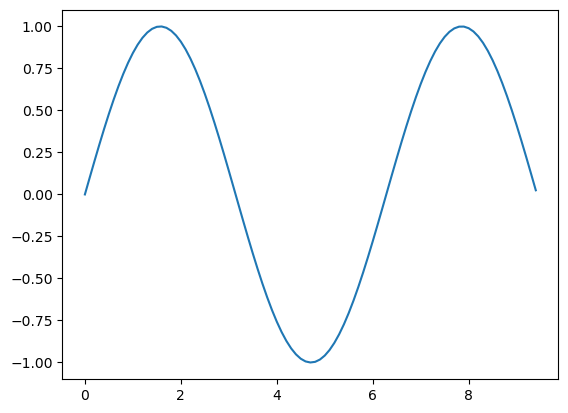

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

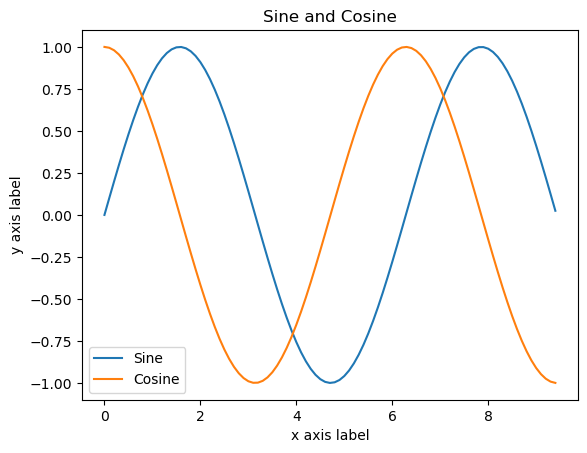

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

You can read much more about the plot function [in the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

## <a id="mpl-subplot">Subplots</a>
You can plot different things in the same figure using the `subplot` function. Here is an example:

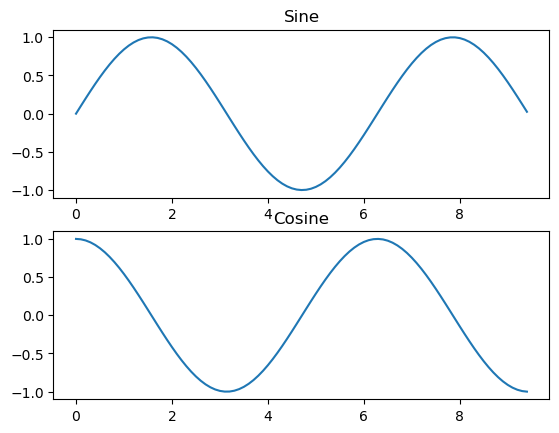

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function [in the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## <a id="mpl-images">Images</a>
You can use the `imshow` function to show images. Here is an example:

C:\Users\p3t1k\AppData\Local\Temp\ipykernel_40528\2119881946.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('../statics/cat.jpg')


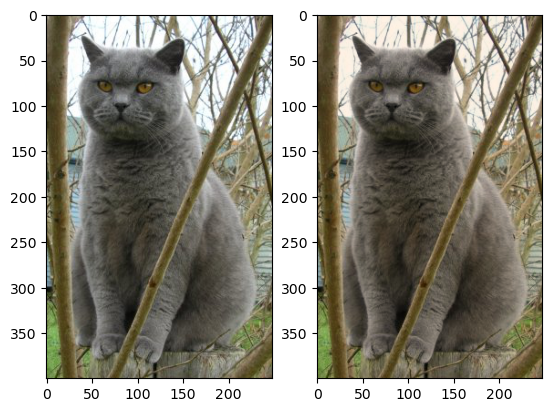

In [ ]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

img = imread('../assets/cat.jpg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()